### Downloading Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read the dataset

In [5]:
df=pd.read_csv('/content/drive/MyDrive/data/insurance.csv')
#df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Exploratory Data Analysis

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.shape

(1338, 7)

- Dataset has 1338 rows and 7 columns

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- There is no missing values in dataset

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

<Axes: xlabel='sex', ylabel='count'>

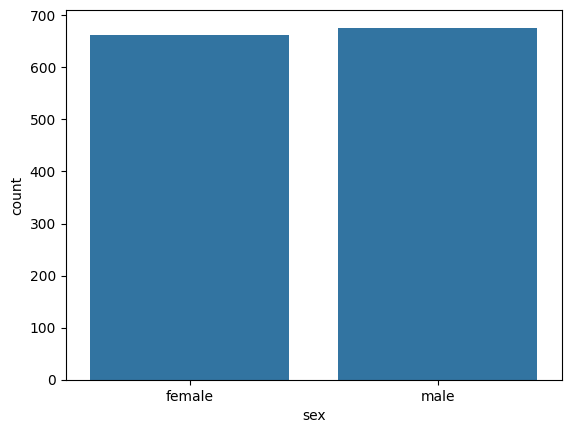

In [10]:
sns.countplot(x='sex',data=df)

- Male and Female have almost equal in number in dataset

In [11]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

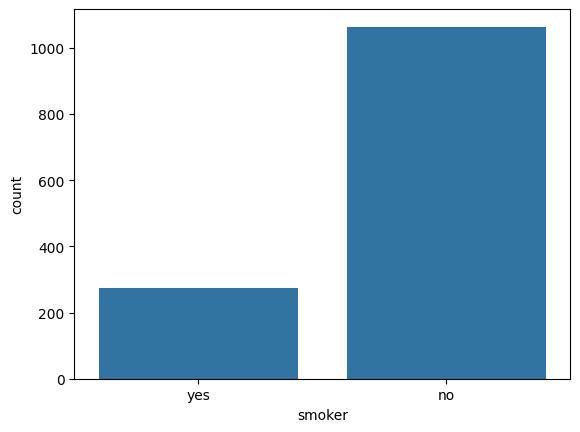

In [12]:
sns.countplot(x='smoker',data=df)

- In dataset around 274 are smokers and 1064 are non smokers

<Axes: xlabel='region', ylabel='count'>

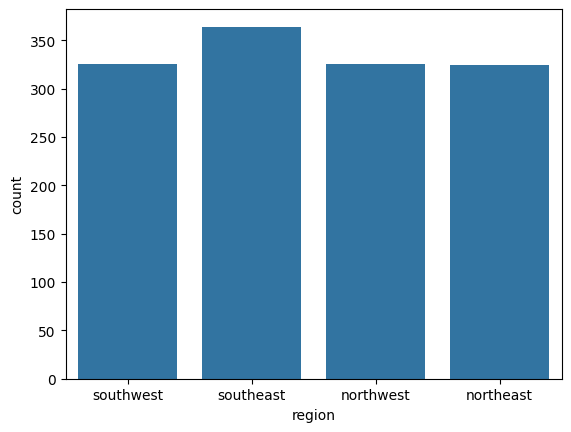

In [13]:
sns.countplot(x='region',data=df)

- Four regions southwest, southeast, northwest, norteast region population almost similar in numbers

<Axes: title={'center': 'age'}, ylabel='Frequency'>

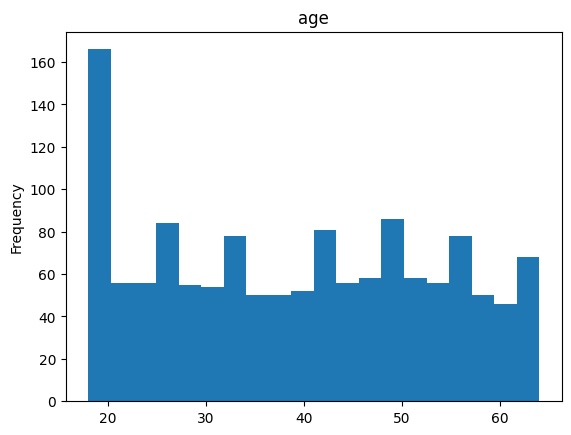

In [14]:
df['age'].plot(kind='hist',bins=20,title='age')

- age below 20 years have more data points (around 160) and remain all datapoints are have age between 55 to 85 and similar in numbers

<Axes: title={'center': 'bmi'}, ylabel='Frequency'>

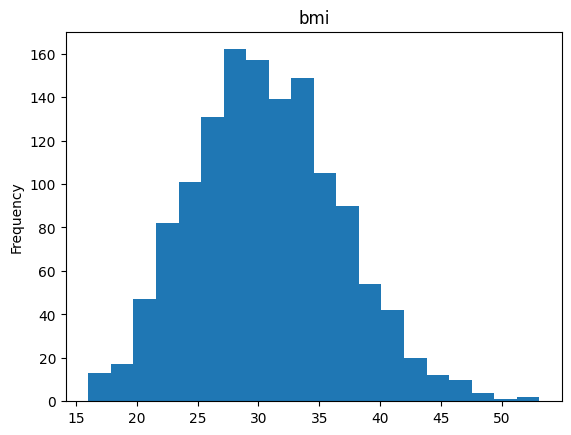

In [15]:
df['bmi'].plot(kind='hist',bins=20, title='bmi')

- BMI follows normal distribution

<Axes: ylabel='Frequency'>

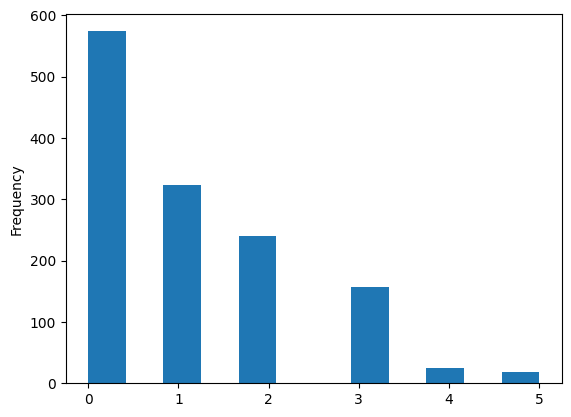

In [16]:
df['children'].plot(kind='hist',bins=12)

- People with no children is more in number, since in data set population with less than 20 years is more in numbers
- population with 4 and 5 children is very less

# Bivariate analysis

<Axes: xlabel='age', ylabel='expenses'>

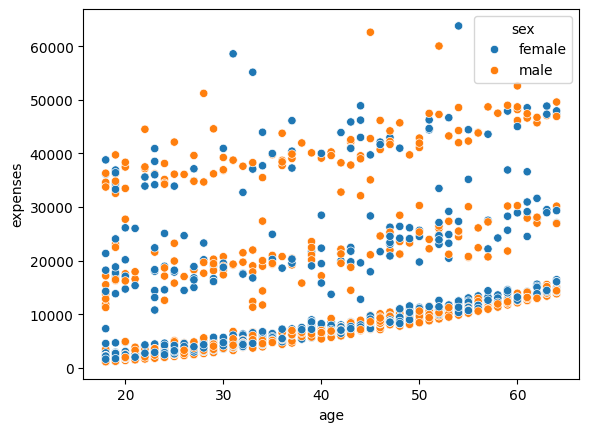

In [17]:
sns.scatterplot(x='age',y='expenses',data=df,hue='sex')

- As age is increasing, expenses also increasing, however few exceptions can be observed that for the same age few people having less expenses and few people have more expenses, that exceptions can be cleared with below trend

<Axes: xlabel='age', ylabel='expenses'>

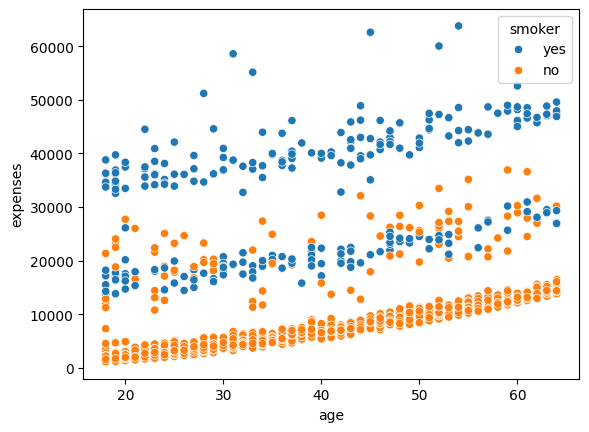

In [18]:
sns.scatterplot(x='age',y='expenses',hue='smoker',data=df)

- it is clear that if person is non smoker, as the age increasing expenses are not increasing much when compared to the smokers, as age increasing expenses are very high.
- For smokers with lower age also having more expenses when compared with non smokers and lowe age
- One exception for this is for few people even though they are non smokers but expenses are higher from below 20 years to more than 60 years

<Axes: xlabel='bmi', ylabel='expenses'>

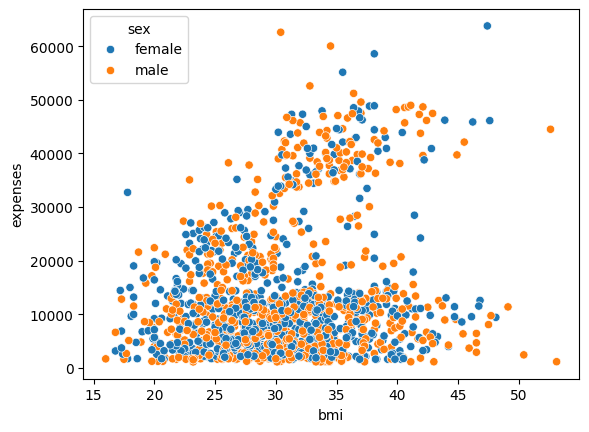

In [19]:
sns.scatterplot(x='bmi',y='expenses',hue='sex',data=df)

- As BMI increases, expenses also increasing however exceptions for the same can be observed

<Axes: xlabel='bmi', ylabel='expenses'>

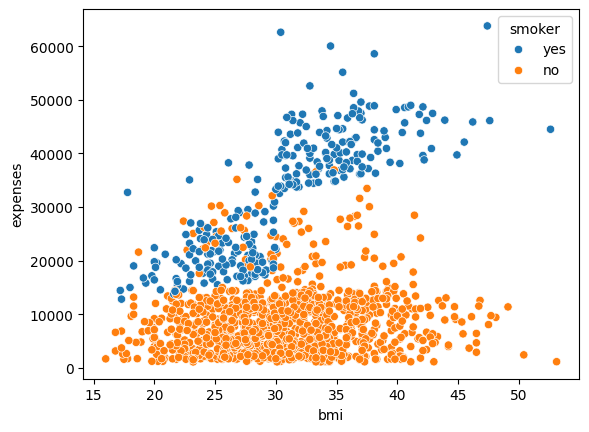

In [20]:
sns.scatterplot(x='bmi',y='expenses',hue='smoker',data=df)

- It is clear evidance that smoker expenses are very high as BMI increses, but for non-smoker expenses slightly increases as BMI increaes but non as high as smoker.
- For non-smoker with healthy BMI has less expenses when compared with smoker with healthy index

<Axes: xlabel='children', ylabel='expenses'>

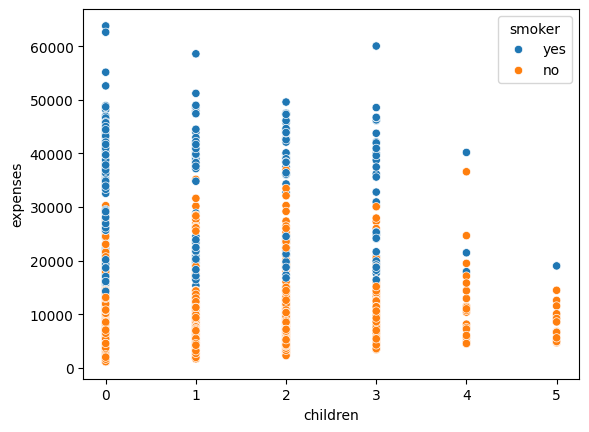

In [21]:
sns.scatterplot(x='children',y='expenses',hue='smoker',data=df)

- expenses of non smoker with any number of children from 0 to 1 has less expenses when compared with smokers with any number of children has higher expenses

# Feature Engineering

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Target encoding to sex,smoker columns

In [23]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [24]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# One hot encoding for region column

In [26]:
region_encoded=pd.get_dummies(df['region'],drop_first=True)

In [27]:
df=pd.concat([df,region_encoded],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,False,False,True
1,18,1,33.8,1,0,southeast,1725.55,False,True,False
2,28,1,33.0,3,0,southeast,4449.46,False,True,False
3,33,1,22.7,0,0,northwest,21984.47,True,False,False
4,32,1,28.9,0,0,northwest,3866.86,True,False,False


In [28]:
df.drop('region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,False,False,True
1,18,1,33.8,1,0,1725.55,False,True,False
2,28,1,33.0,3,0,4449.46,False,True,False
3,33,1,22.7,0,0,21984.47,True,False,False
4,32,1,28.9,0,0,3866.86,True,False,False


<Axes: >

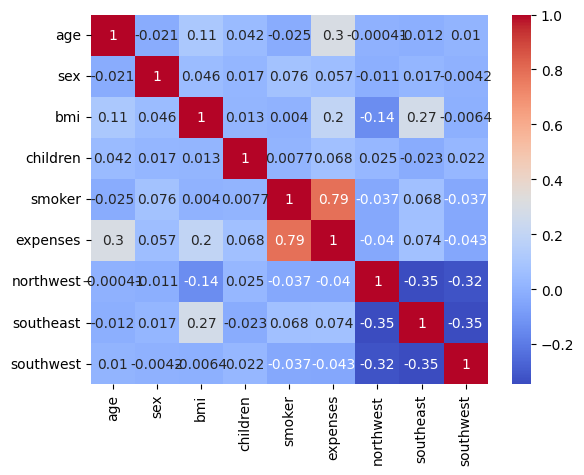

In [29]:
k=df.corr()
sns.heatmap(k,annot=True, cmap='coolwarm')

- it is clear that sex,region columns are least correlation with target column(expenses)
- smoker column has highest positive correlation with expenses column
- bmi column also has good positive correlation with expenses column
- as already very less column is the dataset as of now not removing any columns and going ahead for model building

<ipython-input-30-835291d2b41d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['expenses'],shade=True)


<Axes: xlabel='expenses', ylabel='Density'>

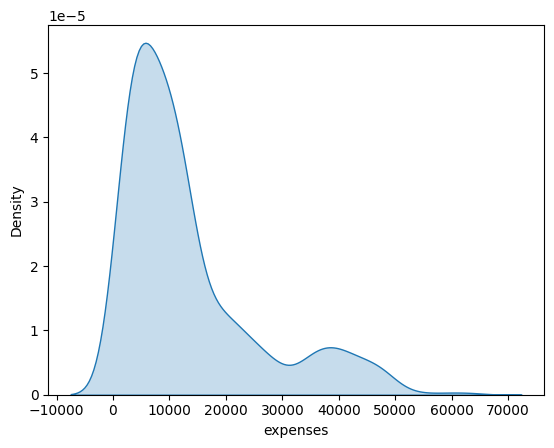

In [30]:
sns.kdeplot(df['expenses'],shade=True)

# Model Building

In [31]:
X=df.drop('expenses',axis=1)
y=df['expenses']

In [32]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.8 MB/s eta 0:00:00


In [33]:
!pip install lightgbm

In [49]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [35]:
from sklearn.metrics import mean_squared_error

In [38]:
# Dictionary which contains models for experiment
models = {
    'LinearRegressor':LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Catboost": CatBoostRegressor(),
    "LGBM": LGBMRegressor(),
    "XGBoost": XGBRegressor(),

    "AdaBoost": AdaBoostRegressor()
}

In [50]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_r2=r2_score(y_train, y_train_pred)



        # Test set performance
        model_test_r2=r2_score(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_r2))
        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_r2))

        print('----------------------------------')

    #report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

    #return report

In [51]:
evaluate_models(X, y, models)


LinearRegressor
Model performance for Training set
- Accuracy: 0.7418
Model performance for Test set
- Accuracy: 0.7836
----------------------------------
Random Forest
Model performance for Training set
- Accuracy: 0.9754
Model performance for Test set
- Accuracy: 0.8624
----------------------------------
Decision Tree
Model performance for Training set
- Accuracy: 0.9983
Model performance for Test set
- Accuracy: 0.7281
----------------------------------
Learning rate set to 0.041383
0:	learn: 11626.7209013	total: 960us	remaining: 959ms
1:	learn: 11278.1927089	total: 1.75ms	remaining: 874ms
2:	learn: 10962.8024538	total: 2.72ms	remaining: 903ms
3:	learn: 10627.4061563	total: 3.78ms	remaining: 942ms
4:	learn: 10319.9558163	total: 4.83ms	remaining: 961ms
5:	learn: 10022.4286278	total: 5.9ms	remaining: 977ms
6:	learn: 9735.9824324	total: 7.02ms	remaining: 996ms
7:	learn: 9469.8625946	total: 7.63ms	remaining: 946ms
8:	learn: 9222.0861969	total: 8.85ms	remaining: 974ms
9:	learn: 8980.1961

- based on all the models, Catboost model is giving the best performance, train data r2 score is 0.9463 and test data r2 score is 0.8696